In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import zscore
from scipy.stats.mstats import winsorize
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

2. Load the Dataset

In [ ]:
dataset=pd.read_csv("titanic.csv")

In [ ]:
dataset.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


3. Perform the below Visualizations

*  Univariate Analysis


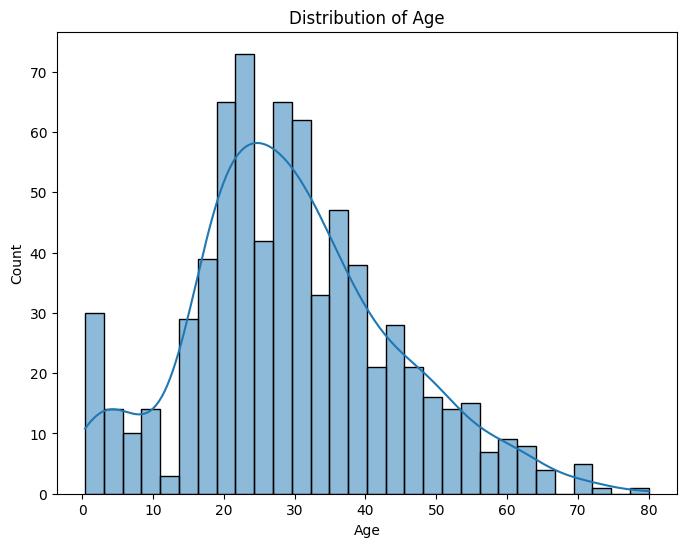

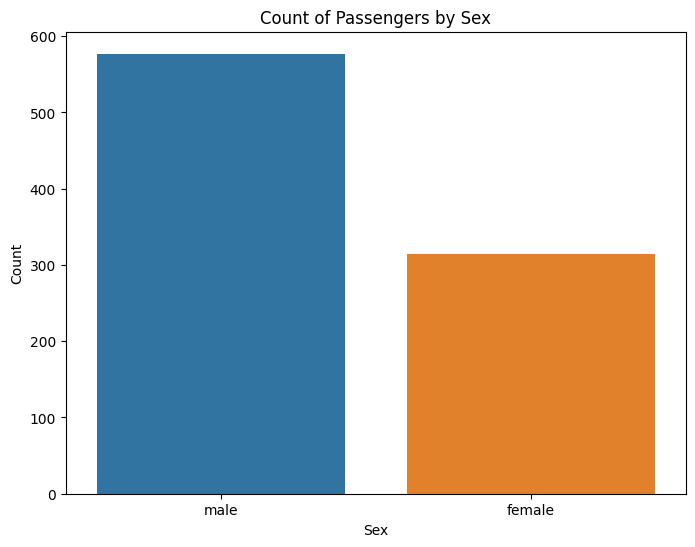

In [ ]:
# Example: Univariate Analysis
# Let's consider the "Age" variable from the Titanic dataset for demonstration purposes
# Plot a histogram of the "Age" variable

plt.figure(figsize=(8, 6))
sns.histplot(data=dataset, x="age", bins=30, kde=True)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# Plot a bar chart of the "Sex" variable
plt.figure(figsize=(8, 6))
sns.countplot(data=dataset, x="sex")
plt.title("Count of Passengers by Sex")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

*  Bi - Variate Analysis  

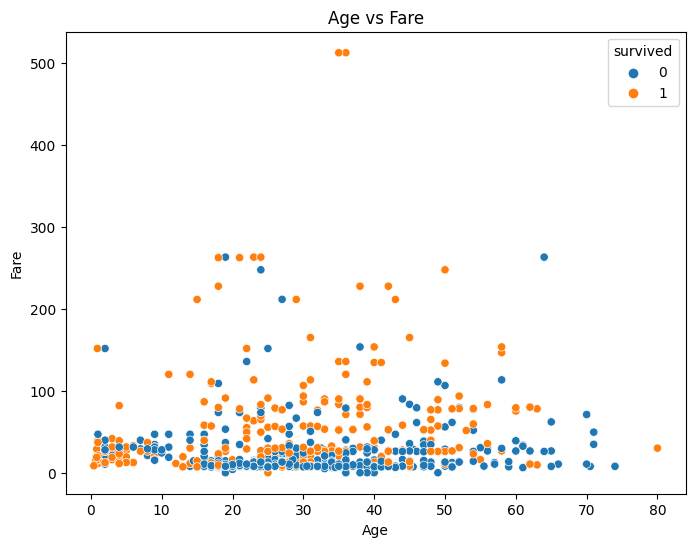

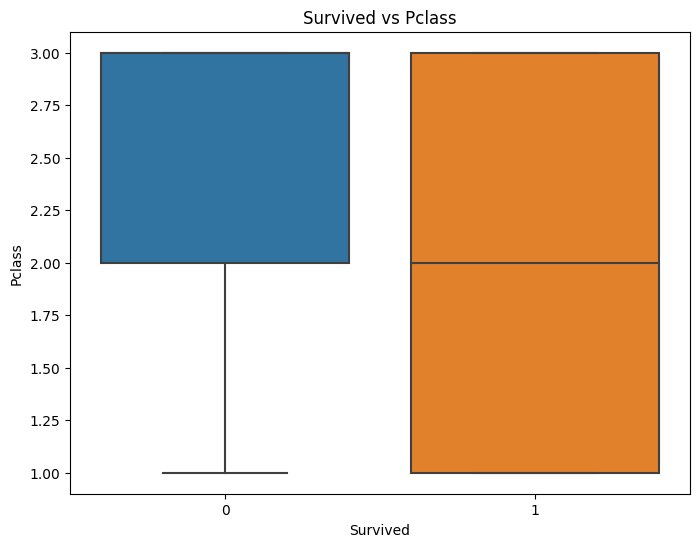

In [ ]:
# Example: Bivariate Analysis
# Let's consider the "Age" and "Fare" variables from the Titanic dataset for demonstration purposes

# Scatter plot of "Age" vs "Fare"
plt.figure(figsize=(8, 6))
sns.scatterplot(data=dataset, x="age", y="fare", hue="survived")
plt.title("Age vs Fare")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()

# Box plot of "Survived" vs "Pclass"
plt.figure(figsize=(8, 6))
sns.boxplot(data=dataset, x="survived", y="pclass")
plt.title("Survived vs Pclass")
plt.xlabel("Survived")
plt.ylabel("Pclass")
plt.show()

*  Multivariate Analysis

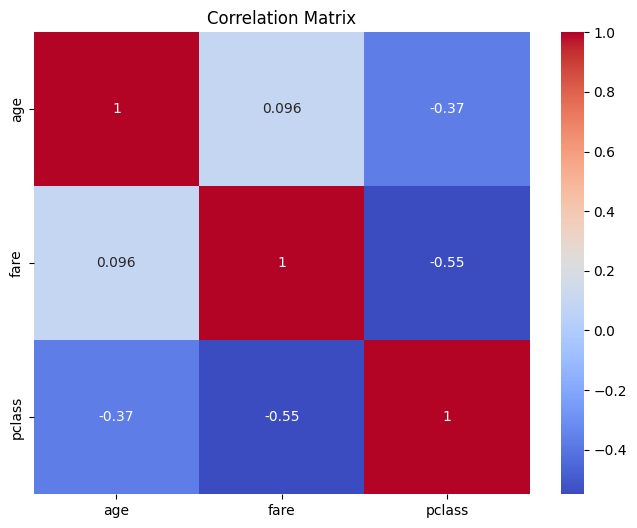

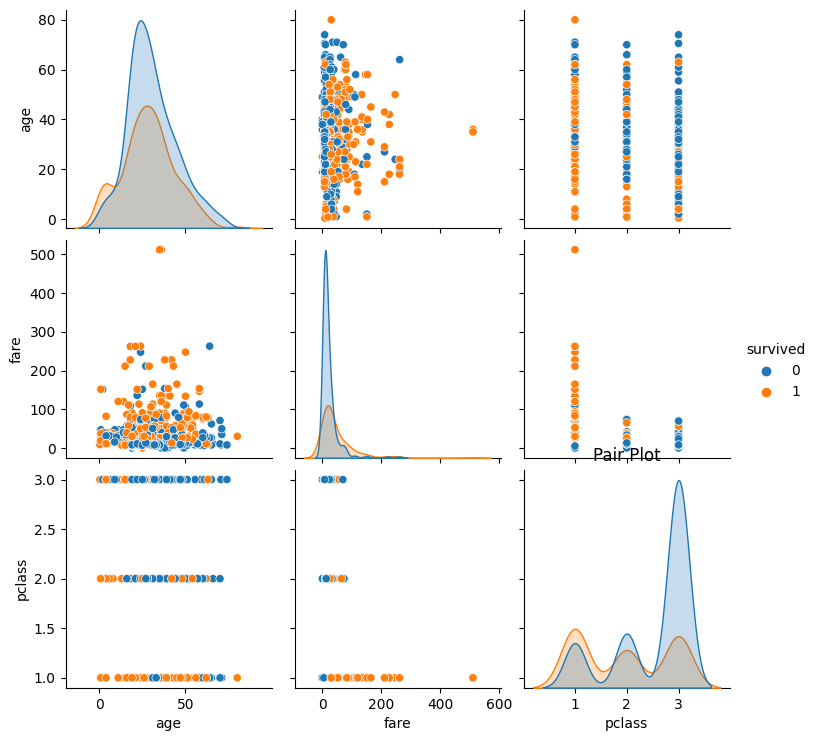

In [ ]:
# Example: Multivariate Analysis
# Let's consider the "Age", "Fare", and "Pclass" variables from the Titanic dataset for demonstration purposes

# Correlation matrix
corr_matrix = dataset[["age", "fare", "pclass"]].corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# Pair plot
sns.pairplot(data=dataset, vars=["age", "fare", "pclass"], hue="survived")
plt.title("Pair Plot")
plt.show()

4. Perform descriptive statistics on the dataset

In [ ]:
# Example: Descriptive Statistics
# Let's consider the "Age" and "Fare" variables from the Titanic dataset for demonstration purposes

# Select the columns of interest
selected_columns = ["age", "fare"]

# Calculate descriptive statistics
statistics = dataset[selected_columns].describe()

# Display the statistics
print(statistics)

              age        fare
count  714.000000  891.000000
mean    29.699118   32.204208
std     14.526497   49.693429
min      0.420000    0.000000
25%     20.125000    7.910400
50%     28.000000   14.454200
75%     38.000000   31.000000
max     80.000000  512.329200


5. Handle the Missing values

In [ ]:
# Example: Handling Missing Values
# Check for missing values
missing_values = dataset.isnull().sum()
print("Missing Values:")
print(missing_values)

# Handling missing values

# 1. Dropping rows or columns with missing values
dataset.dropna(inplace=True)  # Drop rows with any missing values

# 2. Imputing missing values
# Fill missing values with the mean value of the column
dataset["age"].fillna(dataset["age"].mean(), inplace=True)

# Fill missing values with the most frequent value (mode) of the column
dataset["embarked"].fillna(dataset["embarked"].mode()[0], inplace=True)

# Check again for missing values after handling
missing_values_after_handling = dataset.isnull().sum()
print("Missing Values after Handling:")
print(missing_values_after_handling)

Missing Values:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64
Missing Values after Handling:
survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64


6. Find the outliers and replace the outliers

In [ ]:
# Find outliers using z-score method
z_scores = zscore(dataset["fare"])
threshold = 3  # Set the threshold for defining outliers
outliers = np.where(np.abs(z_scores) > threshold)[0]

# Print the indices of outliers
print("Indices of outliers:")
print(outliers)

Indices of outliers:
[136 152]


In [ ]:
# Identify outliers using Winsorization
winsorized_fare = winsorize(dataset["fare"], limits=[0.05, 0.05])

# Replace outliers with the winsorized values
dataset["fare"] = winsorized_fare

# Verify the replacement
print("fare values after replacing outliers:")
print(dataset["fare"])

fare values after replacing outliers:
1      71.2833
3      53.1000
6      51.8625
10     16.7000
11     26.5500
        ...   
871    52.5542
872    10.5000
879    83.1583
887    30.0000
889    30.0000
Name: fare, Length: 182, dtype: float64


7. Check for Categorical columns and perform encoding

In [ ]:
# Example: Checking Categorical Columns and Performing Encoding
# Identify categorical columns
categorical_columns = dataset.select_dtypes(include=["object"]).columns
print("Categorical Columns:")
print(categorical_columns)

# Perform one-hot encoding using pandas get_dummies() function
encoded_dataset = pd.get_dummies(dataset, columns=categorical_columns)

# Display the encoded dataset
print("\nEncoded Dataset:")
print(encoded_dataset.head())

Categorical Columns:
Index(['sex', 'embarked', 'class', 'who', 'deck', 'embark_town', 'alive'], dtype='object')

Encoded Dataset:
    survived  pclass   age  sibsp  parch     fare  adult_male  alone  \
1          1       1  38.0      1      0  71.2833       False  False   
3          1       1  35.0      1      0  53.1000       False  False   
6          0       1  54.0      0      0  51.8625        True   True   
10         1       3   4.0      1      1  16.7000       False  False   
11         1       1  58.0      0      0  26.5500       False   True   

    sex_female  sex_male  ...  deck_C  deck_D  deck_E  deck_F  deck_G  \
1            1         0  ...       1       0       0       0       0   
3            1         0  ...       1       0       0       0       0   
6            0         1  ...       0       0       1       0       0   
10           1         0  ...       0       0       0       0       1   
11           1         0  ...       1       0       0       0       0   

8. Split the data into dependent and independent variables

In [ ]:
# Example: Splitting Data into Dependent and Independent Variables

# Split the data into dependent and independent variables
X = dataset.drop("survived", axis=1)  # Features (independent variables)
y = dataset["survived"]  # Target variable (dependent variable)

# Display the independent variables (features)
print("Independent Variables (Features):")
print(X.head())

# Display the dependent variable (target)
print("\nDependent Variable (Target):")
print(y.head())

Independent Variables (Features):
    pclass     sex   age  sibsp  parch     fare embarked  class    who  \
1        1  female  38.0      1      0  71.2833        C  First  woman   
3        1  female  35.0      1      0  53.1000        S  First  woman   
6        1    male  54.0      0      0  51.8625        S  First    man   
10       3  female   4.0      1      1  16.7000        S  Third  child   
11       1  female  58.0      0      0  26.5500        S  First  woman   

    adult_male deck  embark_town alive  alone  
1        False    C    Cherbourg   yes  False  
3        False    C  Southampton   yes  False  
6         True    E  Southampton    no   True  
10       False    G  Southampton   yes  False  
11       False    C  Southampton   yes   True  

Dependent Variable (Target):
1     1
3     1
6     0
10    1
11    1
Name: survived, dtype: int64


9. Scale the independent variables

In [ ]:
# Select the independent variables (features)
name=X.columns

In [ ]:
name

Index(['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class',
       'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

ValueError: ignored

In [ ]:
X=pd.DataFrame(X_scaled,columns=name)
X

NameError: ignored

10. Split the data into training and testing

In [ ]:

# Split the data into dependent and independent variables
X = dataset.drop("survived", axis=1)  # Features (independent variables)
y = dataset["survived"]  # Target variable (dependent variable)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (145, 14)
Shape of X_test: (37, 14)
Shape of y_train: (145,)
Shape of y_test: (37,)
